In [1]:
import pandas as pd
from accre_functions import *

Initializing the data.
Now reading '../data/updated_jobs.csv'.


Reading CSV: 100%|██████████| 7395885/7395885 [00:35<00:00, 207882.47rows/s]


Completed reading '../data/updated_jobs.csv'.
Now reading '../data/servers_9204.csv'.


Reading CSV: 100%|██████████| 314709/314709 [00:01<00:00, 232043.00rows/s]


Completed reading '../data/servers_9204.csv'.


c:\Users\irela\Documents\NSS_Projects\accre-sweet-potato-casserole\notebooks\accre_functions.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.jobs_filtered_by_completed['end_dt_min_start'] = self.jobs_filtered_by_completed['END_dt'].dt.floor('min')


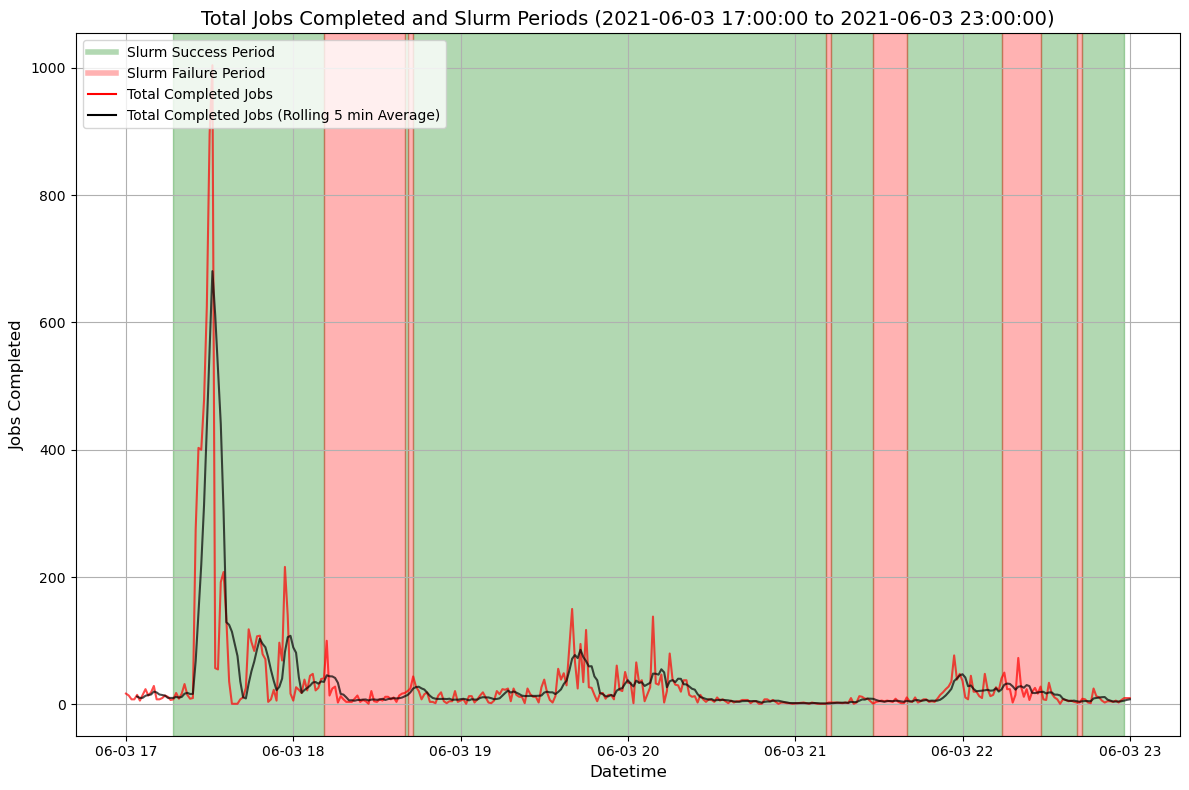

In [2]:
processor = ACCREDataProcessor()
processor.plot_jobs_and_servers_with_slurm_periods(begin_date='2021-06-03 17:00:00', end_date='2021-06-03 23:00:00', rolling=5)

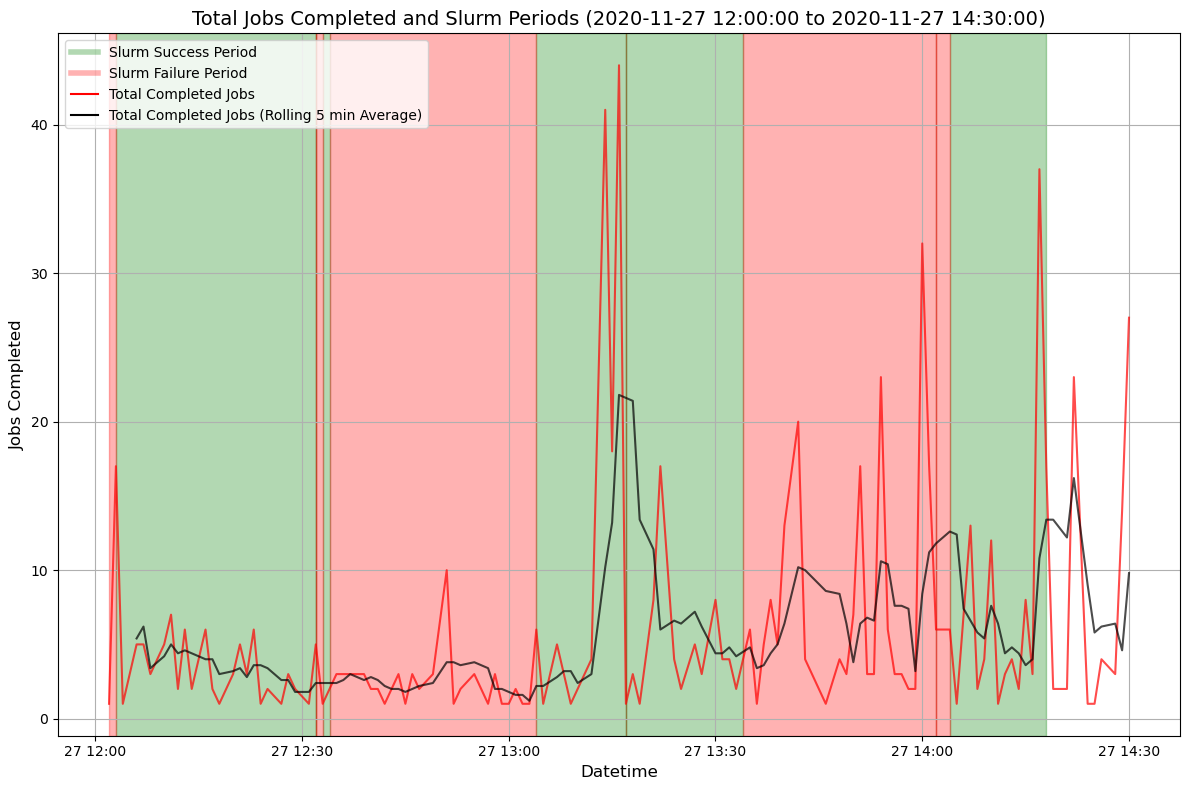

In [5]:
processor.plot_jobs_and_servers_with_slurm_periods(begin_date='2020-11-27 12:00:00', end_date='2020-11-27 14:30:00', rolling=5)

In [7]:
data_df = processor.data
data_df.head(2)

,total_completed_jobs,slurm_success
datetime,,
2020-10-01 00:10:00,1.0,NaN
2020-10-01 00:12:00,1.0,NaN


In [5]:
import statsmodels.formula.api as smf
import numpy as np

In [6]:
def logistic(x):
    return 1/(1+np.exp(-x))

In [12]:
window_sizes = [str(x)+'min' for x in range(1, 5)]
results = {}
for window in window_sizes:
    rolling_col_name = f'rolling_completed_jobs_{window}'
    data_df[rolling_col_name] = data_df['total_completed_jobs'].rolling(window, closed='left').mean()
    formula = f'slurm_success ~ total_completed_jobs + {rolling_col_name} + (total_completed_jobs * {rolling_col_name})'
    model = smf.logit(formula, data=data_df).fit()
    results[window] = model
    print(f"Summary for {window} rolling average:")
    print(model.summary())

Optimization terminated successfully.
         Current function value: 0.156800
         Iterations 8
Summary for 1min rolling average:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:                44493
Model:                          Logit   Df Residuals:                    44489
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                0.005155
Time:                        21:43:15   Log-Likelihood:                -6976.5
converged:                       True   LL-Null:                       -7012.6
Covariance Type:            nonrobust   LLR p-value:                 1.370e-15
                                                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------

In [15]:
processor.test_range_rolling_completed_jobs()

Optimization terminated successfully.
         Current function value: 0.156812
         Iterations 8
Summary for 1min rolling average:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:                44493
Model:                          Logit   Df Residuals:                    44490
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                0.005076
Time:                        21:48:21   Log-Likelihood:                -6977.1
converged:                       True   LL-Null:                       -7012.6
Covariance Type:            nonrobust   LLR p-value:                 3.475e-16
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.2139  

In [37]:
processor.calculate_rolling_probability(rolling_jobs_completed=10, total_completed_jobs=101, rolling_period='1min')

0.9335660531491711

In [8]:
rolling_jobs_completed = 100
total_completed_jobs = 50
rolling_period = '2min'
rolling_formula_result = results[rolling_period].params['Intercept'] + results[rolling_period].params['total_completed_jobs']*total_completed_jobs + results[rolling_period].params['rolling_completed_jobs_'+rolling_period]*rolling_jobs_completed
prob = logistic(rolling_formula_result)
prob

0.984356176070484

In [9]:
processor.data.head()

,total_completed_jobs,slurm_success,rolling_completed_jobs_1min,rolling_completed_jobs_2min,rolling_completed_jobs_3min,rolling_completed_jobs_4min
datetime,,,,,,
2020-10-01 00:10:00,1.0,NaN,1.0,1.0,1.0,1.0
2020-10-01 00:12:00,1.0,NaN,1.0,1.0,1.0,1.0
2020-10-01 00:13:00,1.0,NaN,1.0,1.0,1.0,1.0
2020-10-01 00:17:00,2.0,NaN,2.0,2.0,2.0,2.0
2020-10-01 00:19:00,1.0,NaN,1.0,1.0,1.5,1.5


In [10]:
processor.test_range_rolling_completed_jobs(range_begin=1, range_end=6, step_size=1)

Optimization terminated successfully.
         Current function value: 0.156812
         Iterations 8
Summary for 1min rolling average:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:                44493
Model:                          Logit   Df Residuals:                    44490
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                0.005076
Time:                        20:42:03   Log-Likelihood:                -6977.1
converged:                       True   LL-Null:                       -7012.6
Covariance Type:            nonrobust   LLR p-value:                 3.475e-16
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.2139  

In [11]:
processor.calculate_rolling_probability(rolling_jobs_completed=10, total_completed_jobs=500, rolling_period='2min')

0.5828818090615814

In [ ]:
#processor.test_range_rolling_completed_jobs(range_begin=150, range_end=300, step_size=10, closed='right')

Optimization terminated successfully.
         Current function value: 0.176350
         Iterations 7
Summary for 150min rolling average:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:                47217
Model:                          Logit   Df Residuals:                    47214
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:               0.0004008
Time:                        20:42:03   Log-Likelihood:                -8326.7
converged:                       True   LL-Null:                       -8330.1
Covariance Type:            nonrobust   LLR p-value:                   0.03548
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         

In [13]:
processor.calculate_rolling_probability(rolling_jobs_completed=100, total_completed_jobs=100, rolling_period='2min')

ValueError: '2min' not found in self.rolling_range_results. Please try a period within the range in the format '1min'.

In [ ]:
data = processor.data
#data['rolling_left_180min'] = data['total_completed_jobs'].rolling('2min', closed='left').mean()
#data['rolling_right_180min'] = data['total_completed_jobs'].rolling('180min', closed='right').mean()
data.head(2)

,total_completed_jobs,slurm_success,rolling_completed_jobs_1min,rolling_completed_jobs_2min,rolling_completed_jobs_3min,rolling_completed_jobs_4min,rolling_completed_jobs_5min,rolling_completed_jobs_7min,rolling_completed_jobs_9min,rolling_completed_jobs_11min,...,rolling_completed_jobs_210min,rolling_completed_jobs_220min,rolling_completed_jobs_230min,rolling_completed_jobs_240min,rolling_completed_jobs_250min,rolling_completed_jobs_260min,rolling_completed_jobs_270min,rolling_completed_jobs_280min,rolling_completed_jobs_290min,rolling_right_180min
datetime,,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:10:00,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-10-01 00:12:00,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#leftright_logreg = smf.logit('slurm_success ~ total_completed_jobs + rolling_right_180min + (total_completed_jobs * rolling_right_180min)', data=data).fit()
#leftright_logreg.summary()

Optimization terminated successfully.
         Current function value: 0.176338
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          slurm_success   No. Observations:                47217
Model:                          Logit   Df Residuals:                    47213
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:               0.0004697
Time:                        19:47:31   Log-Likelihood:                -8326.2
converged:                       True   LL-Null:                       -8330.1
Covariance Type:            nonrobust   LLR p-value:                   0.04977
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     3.1033      0.035     89.327      0.000       3.035       3.171
total_completed_jobs                         -0.0024      0.001     -2.424      0.015      -0.004      -0.000
rolling_right_180min                          0.0026      0.002      1.386      0.166      -0.001       0.006
total_completed_jobs:rolling_right_180min  1.215e-05   1.87e-05      0.650      0.516   -2.45e-05    4.88e-05
=============================================================================================================
"""

In [ ]:
data = processor.data
data_w = data
data_w['future_av'] = data_w.apply()

# Calculate the average of completed jobs within this range
average_completed_jobs = filtered_data['total_completed_jobs'].mean()
time_span = [str(x)+'min' for x in range(45, 60, 1)]
rolling_range_dict = {}
for period in time_span:
    rolling_col_name = f'rolling_right_{period}'
    print(rolling_col_name)
    data[rolling_col_name] = data['total_completed_jobs'].shift().rolling(period, closed='right').mean()
    function = f'slurm_success ~ total_completed_jobs + {rolling_col_name} + (total_completed_jobs *{rolling_col_name})'
    model = smf.logit(function, data=data).fit()
    rolling_range_dict[period] = model
    print(f"Summary for {period} rolling average:")
    print(model.summary())

rolling_right_45min
Optimization terminated successfully.
         Current function value: 0.176350
         Iterations 7
Summary for 45min rolling average:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:                47217
Model:                          Logit   Df Residuals:                    47213
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:               0.0004052
Time:                        20:02:44   Log-Likelihood:                -8326.7
converged:                       True   LL-Null:                       -8330.1
Covariance Type:            nonrobust   LLR p-value:                   0.08026
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [31]:
my_data = data_df.reset_index()
my_data['datetime'] = my_data['datetime'].astype('datetime64[ns]')
my_data.head(2)

,datetime,total_completed_jobs,slurm_success,rolling_completed_jobs_1min,rolling_completed_jobs_2min,rolling_completed_jobs_3min,rolling_completed_jobs_4min,rolling_completed_jobs_5min,rolling_completed_jobs_150min,rolling_completed_jobs_160min,...,rolling_completed_jobs_200min,rolling_completed_jobs_210min,rolling_completed_jobs_220min,rolling_completed_jobs_230min,rolling_completed_jobs_240min,rolling_completed_jobs_250min,rolling_completed_jobs_260min,rolling_completed_jobs_270min,rolling_completed_jobs_280min,rolling_completed_jobs_290min
0,2020-10-01 00:10:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2020-10-01 00:12:00,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [32]:
def compute_future_avg(row):
    start_time = row['datetime'] + pd.Timedelta(minutes=30)
    end_time = row['datetime'] + pd.Timedelta(minutes=50)
    filtered_df = my_data[my_data['datetime'].between(start_time, end_time)]
    return filtered_df['total_completed_jobs'].mean()

In [34]:
my_data.columns

Index(['datetime', 'total_completed_jobs', 'slurm_success',
       'rolling_completed_jobs_1min', 'rolling_completed_jobs_2min',
       'rolling_completed_jobs_3min', 'rolling_completed_jobs_4min',
       'rolling_completed_jobs_5min', 'rolling_completed_jobs_150min',
       'rolling_completed_jobs_160min', 'rolling_completed_jobs_170min',
       'rolling_completed_jobs_180min', 'rolling_completed_jobs_190min',
       'rolling_completed_jobs_200min', 'rolling_completed_jobs_210min',
       'rolling_completed_jobs_220min', 'rolling_completed_jobs_230min',
       'rolling_completed_jobs_240min', 'rolling_completed_jobs_250min',
       'rolling_completed_jobs_260min', 'rolling_completed_jobs_270min',
       'rolling_completed_jobs_280min', 'rolling_completed_jobs_290min'],
      dtype='object')

In [46]:
my_data['future_avg'] = my_data.apply(lambda row: compute_future_avg(row), axis=1)
my_data.head()

KeyboardInterrupt: 